In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
import pandas as pd

# 불러오기
base_df = pd.read_parquet("../data/train/3.승인매출정보/201812_train_승인매출정보.parquet")

print(base_df.head())

     기준년월            ID  최종이용일자_기본  최종이용일자_신판  최종이용일자_CA  최종이용일자_카드론  \
0  201812  TRAIN_000000   20181224   20181224   20181221       10101   
1  201812  TRAIN_000001   20181214   20181214   20170728    20170327   
2  201812  TRAIN_000002   20181228   20181228   20181216    20151119   
3  201812  TRAIN_000003   20181221   20181212   20181221       10101   
4  201812  TRAIN_000004   20180905   20180905      10101       10101   

   최종이용일자_체크  최종이용일자_일시불  최종이용일자_할부  이용건수_신용_B0M  ...  승인거절건수_한도초과_B0M  \
0   20180203    20181224   20180713            7  ...                0   
1      10101    20181214   20171231            9  ...                0   
2   20141230    20181228   20181115           20  ...                0   
3   20141111    20181203   20181212           12  ...                0   
4   20181210    20180905      10101            0  ...                0   

   승인거절건수_BL_B0M  승인거절건수_입력오류_B0M  승인거절건수_기타_B0M  승인거절건수_R3M  승인거절건수_한도초과_R3M  \
0              0                0        

In [3]:
# 1. Segment 정보 불러오기
member_df = pd.read_parquet("../data/train/1.회원정보/201812_train_회원정보.parquet", columns=["ID", "Segment"])

# 2. 병합
df = pd.merge(base_df, member_df, on="ID", how="left")

# 3. 결과
df

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,이용금액대,Segment
0,201812,TRAIN_000000,20181224,20181224,20181221,10101,20180203,20181224,20180713,7,...,0,0,0,0,0,0,0,0,01.100만원+,D
1,201812,TRAIN_000001,20181214,20181214,20170728,20170327,10101,20181214,20171231,9,...,0,0,0,0,0,0,0,0,03.30만원+,E
2,201812,TRAIN_000002,20181228,20181228,20181216,20151119,20141230,20181228,20181115,20,...,0,0,0,0,0,0,0,0,01.100만원+,C
3,201812,TRAIN_000003,20181221,20181212,20181221,10101,20141111,20181203,20181212,12,...,0,0,0,0,0,0,0,0,01.100만원+,D
4,201812,TRAIN_000004,20180905,20180905,10101,10101,20181210,20180905,10101,0,...,0,0,0,0,0,0,0,0,05.10만원-,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,20181220,20181220,10101,10101,20181212,20181220,20160501,2,...,0,0,0,0,0,0,0,0,09.미사용,E
399996,201812,TRAIN_399996,20181202,20181202,10101,20170112,10101,20181202,20180112,10,...,0,0,0,0,0,0,0,0,01.100만원+,D
399997,201812,TRAIN_399997,20181230,20181230,10101,10101,20131124,20181230,20180919,10,...,0,0,0,0,0,0,0,0,02.50만원+,C
399998,201812,TRAIN_399998,20161224,20161224,10101,10101,10101,20161224,20150122,-2,...,0,0,0,0,0,0,0,0,09.미사용,E


In [4]:
# Recency
recency_cols = [
    '이용후경과월_신용',
    '이용후경과월_체크',
    '이용후경과월_카드론',
]

# Frequency (최근 6개월간 이용건수)
frequency_cols = [
    '이용건수_신용_R6M',
    '이용건수_체크_R6M',
]

# Monetary (최근 6개월간 총 이용금액)
monetary_cols = [
    '이용금액_일시불_R6M',
    '이용금액_할부_R6M',
    '이용금액_CA_R6M',
    '이용금액_체크_R6M',
    '이용금액_카드론_R6M',
]

# 최종 컬럼 목록
rfm_cols = ['ID'] + recency_cols + frequency_cols + monetary_cols

In [5]:
# 가장 최근 사용한 카드 유형의 경과월만 사용 (예: 3개 중 최소값)
df['Recency'] = df[recency_cols].min(axis=1)

df['Frequency'] = df[frequency_cols].sum(axis=1)
df['Monetary'] = df[monetary_cols].sum(axis=1)

In [6]:
print(df[['ID', 'Recency', 'Frequency', 'Monetary']].head())

             ID  Recency  Frequency  Monetary
0  TRAIN_000000        0         46     81163
1  TRAIN_000001        0         67     16556
2  TRAIN_000002        0        106    136345
3  TRAIN_000003        0         54     99929
4  TRAIN_000004        0         52     18535


## 고객 4분위로 나누기
- R: 55% / 70% / 85% / 100%
    - 0: 55.5%
    - 0~1: 69.9%
    - 0~8: 86%
    - 0~12: 100%
- F/M: 음수 0으로 바꾼 뒤, 25% / 50% / 75% / 100%
    - pd.qcut: 누적분포 기준 분위수 자동 나눠줌

In [8]:
df['Recency'].value_counts(normalize=True).sort_index()

Recency
0     0.555018
1     0.144732
2     0.060073
3     0.026828
4     0.016762
5     0.012305
6     0.012077
7     0.015232
8     0.017767
9     0.011535
10    0.006540
11    0.005372
12    0.115757
Name: proportion, dtype: float64

In [9]:
# 1. Recency: 낮을수록 점수 높게

def score_recency(r):
    if r == 0:
        return 4
    elif r == 1:
        return 3
    elif r in [2, 3, 4, 5, 6, 7, 8]:
        return 2
    else:
        return 1

df['R_score'] = df['Recency'].apply(score_recency)

# 2. Frequency: 높을수록 점수 높게

df['Frequency'] = df['Frequency'].apply(lambda x: max(x, 0))
df['F_score'] = pd.qcut(df['Frequency'], 4, labels=[1,2,3,4])

# 3. Monetary: 높을수록 점수 높게

df['Monetary'] = df['Monetary'].apply(lambda x: max(x, 0))
df['M_score'] = pd.qcut(df['Monetary'], 4, labels=[1,2,3,4])

In [10]:
print(df['R_score'].value_counts().sort_index())
print(df['F_score'].value_counts().sort_index())
print(df['M_score'].value_counts().sort_index())

R_score
1     55682
2     64418
3     57893
4    222007
Name: count, dtype: int64
F_score
1    100296
2    100093
3    100182
4     99429
Name: count, dtype: int64
M_score
1    100002
2    100000
3     99998
4    100000
Name: count, dtype: int64


## 클래스 분류
- 아래 사진 참고
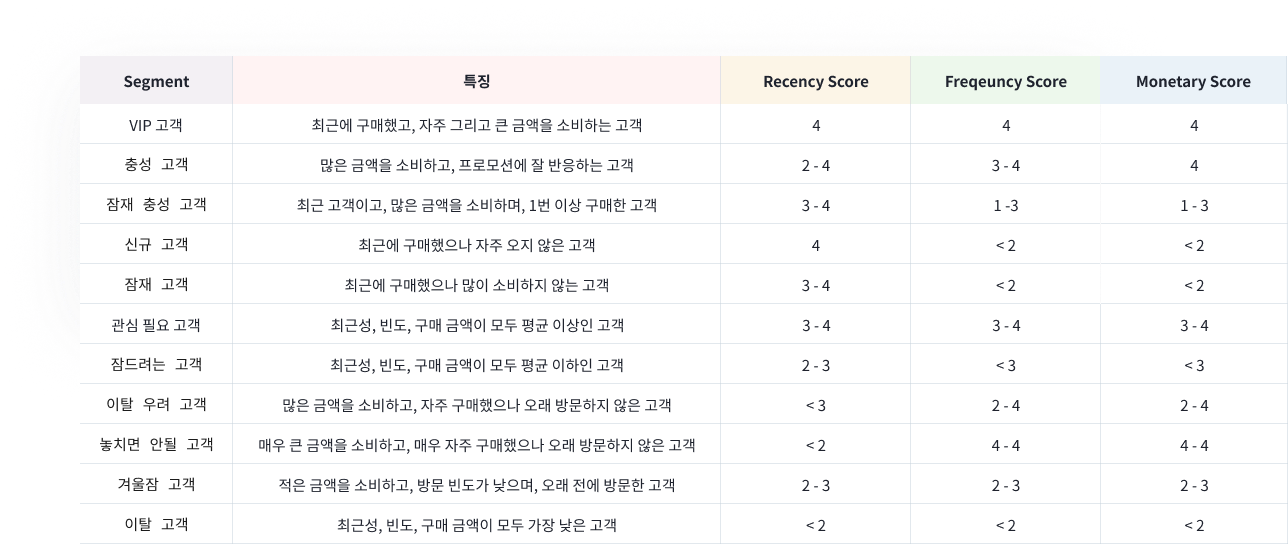

| 세그먼트 이름      | 조건 (R-F-M 기준)                 | 설명 요약                                |
| ------------ | ----------------------------- | ------------------------------------ |
| **VIP 고객**   | `R = 4`, `F = 4`, `M = 4`     | 가장 최근에 방문했고 자주 구매하며 높은 소비를 보이는 핵심 고객 |
| **우수 고객**    | `R ≥ 4`, `F ≥ 3`, `M ≥ 3`     | VIP에 가까운 수준의 우수 활동 고객                |
| **충성 고객**    | `R ≥ 3`, `F ≥ 3`, `M ≥ 2`     | 자주 방문하며 꾸준히 소비하는 안정된 고객              |
| **잠재 충성 고객** | `R ≥ 3`, `F ≤ 3`, `M ≥ 3`     | 최근 활동과 소비는 높지만 방문 빈도는 낮은 고객          |
| **신규 고객**    | `R = 4`, `F ≤ 2`, `M ≤ 2`     | 최근에 첫 방문/구매한 가능성 있는 신규 유입 고객         |
| **관심 필요 고객** | `R ≥ 2`이면서 `(F ≥ 2 또는 M ≥ 2)` | 최근 활동은 있지만 방문 빈도나 소비 중 하나만 높은 고객     |
| **이탈 우려 고객** | `R ≤ 3`, `F ≤ 2`, `M ≤ 2`     | 방문이 줄어들고 소비도 낮은 상태의 이탈 위험군           |
| **이탈 고객**    | `R ≤ 2`, `F ≤ 2`, `M ≤ 2`     | 방문/구매가 모두 거의 없는 고객군                  |
| **기타 고객**    | 위 조건 어디에도 명확히 해당하지 않는 조합      | 불규칙하거나 혼합적인 활동 패턴을 가진 고객             |


In [144]:
# 1. RFM 점수 기반 세분화 함수 정의
def classify_rfm_segment_label_v6(r, f, m):
    # 1. VIP 고객: 완벽한 고객
    if r == 4 and f == 4 and m == 4:
        return "VIP 고객"

    # 2. 우수 고객: RFM 모두 높음
    elif r >= 4 and f >= 3 and m >= 3:
        return "우수 고객"

    # 3. 충성 고객: 비교적 자주, 많이 소비 (약간 느슨하게)
    elif r >= 3 and f >= 3 and m >= 2:
        return "충성 고객"

    # 4. 잠재 충성 고객: R 높고 M 높지만 F 낮음
    elif r >= 3 and f <= 3 and m >= 3:
        return "잠재 충성 고객"

    # 5. 신규 고객: R만 높고 F, M 낮음
    elif r == 4 and f <= 2 and m <= 2:
        return "신규 고객"

    # 6. 관심 필요 고객: R ≥ 2이면서 F나 M 중 하나라도 중간 이상
    elif r >= 2 and (f >= 2 or m >= 2):
        return "관심 필요 고객"

    # 7. 이탈 우려 고객: R ≤ 3이면서 F, M이 둘 다 낮음
    elif r <= 3 and f <= 2 and m <= 2:
        return "이탈 우려 고객"

    # 8. 이탈 고객: 모든 지표가 매우 낮음
    elif r <= 2 and f <= 2 and m <= 2:
        return "이탈 고객"

    # 9. 기타
    else:
        return "기타 고객"


        
# 2. RFM 클래스 적용 (df는 R_score, F_score, M_score, Segment 컬럼을 포함한 데이터프레임)
df['RFM_label'] = df.apply(lambda row: classify_rfm_segment_label_v6(row['R_score'], row['F_score'], row['M_score']), axis=1)

In [146]:
print(df['RFM_label'].value_counts())

RFM_label
이탈 우려 고객    80960
우수 고객       77771
VIP 고객      61371
관심 필요 고객    59921
충성 고객       47585
신규 고객       46285
잠재 충성 고객    25094
기타 고객        1013
Name: count, dtype: int64


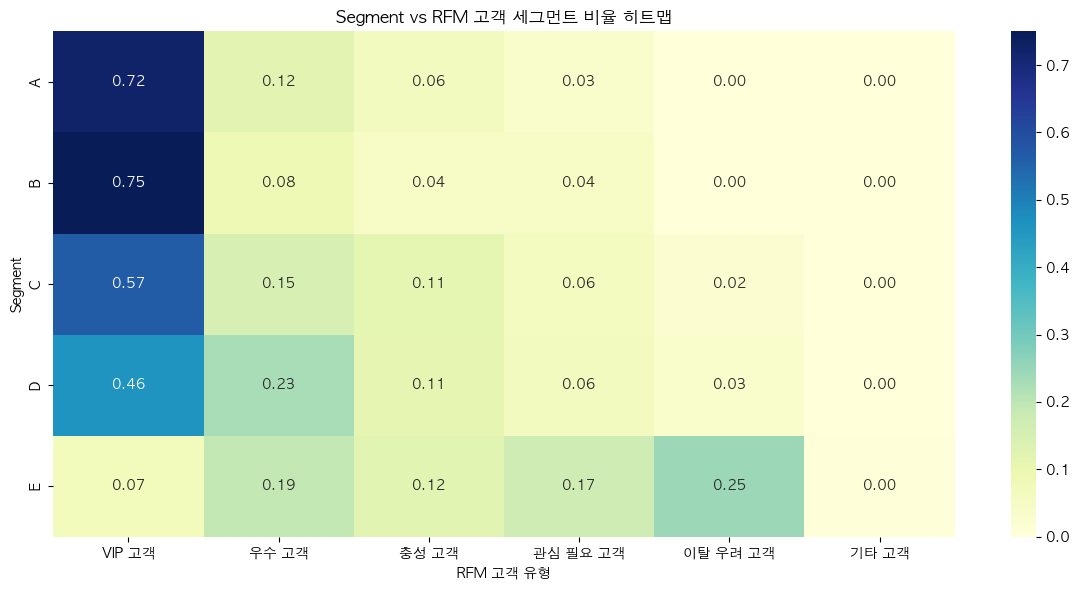

In [148]:
# 2. 교차표 생성
seg_rfm_ct = pd.crosstab(df['Segment'], df['RFM_label'])
seg_rfm_ratio = seg_rfm_ct.div(seg_rfm_ct.sum(axis=1), axis=0)

# 3. 컬럼 순서 정렬
label_order = [
    "VIP 고객", "우수 고객", "충성 고객",
    "관심 필요 고객", "이탈 우려 고객", "기타 고객"
]
existing_cols = [col for col in label_order if col in seg_rfm_ratio.columns]
seg_rfm_ratio = seg_rfm_ratio[existing_cols]

# 4. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(seg_rfm_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Segment vs RFM 고객 세그먼트 비율 히트맵")
plt.xlabel("RFM 고객 유형")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

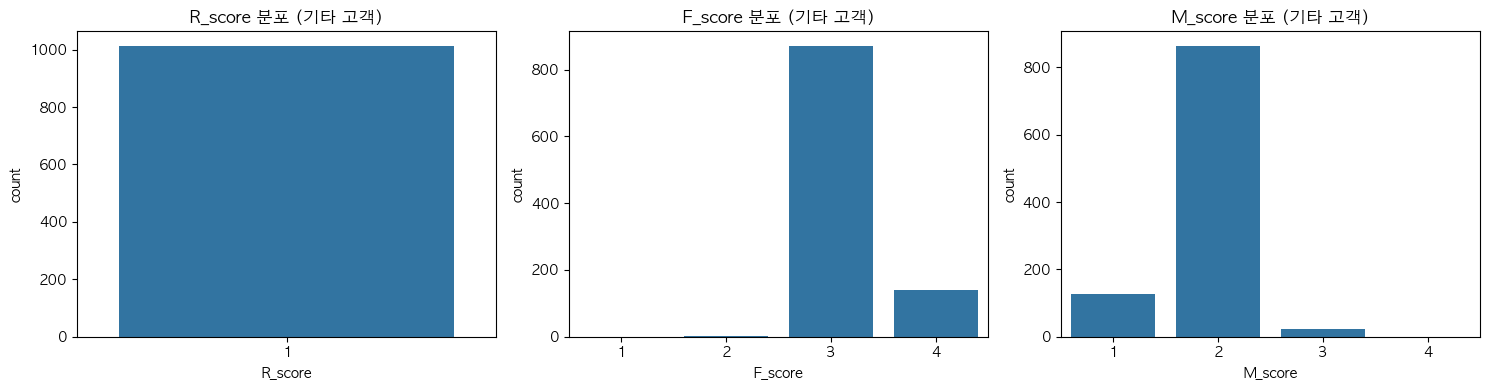

In [150]:
# 기타 고객 필터링
etc_df = df[df['RFM_label'] == '기타 고객']

# R, F, M의 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
for i, col in enumerate(['R_score', 'F_score', 'M_score']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=etc_df, x=col)
    plt.title(f'{col} 분포 (기타 고객)')
plt.tight_layout()
plt.show()
